---

# CSCI 3202, Fall 2023
# Homework 2 (10 pts)
# Due: Wed, Sept 20 at 11:59 pm

<br> 

### Your name:

<br> 

#### Setting up aima-python repo
* Follow the steps outlined in the README file here
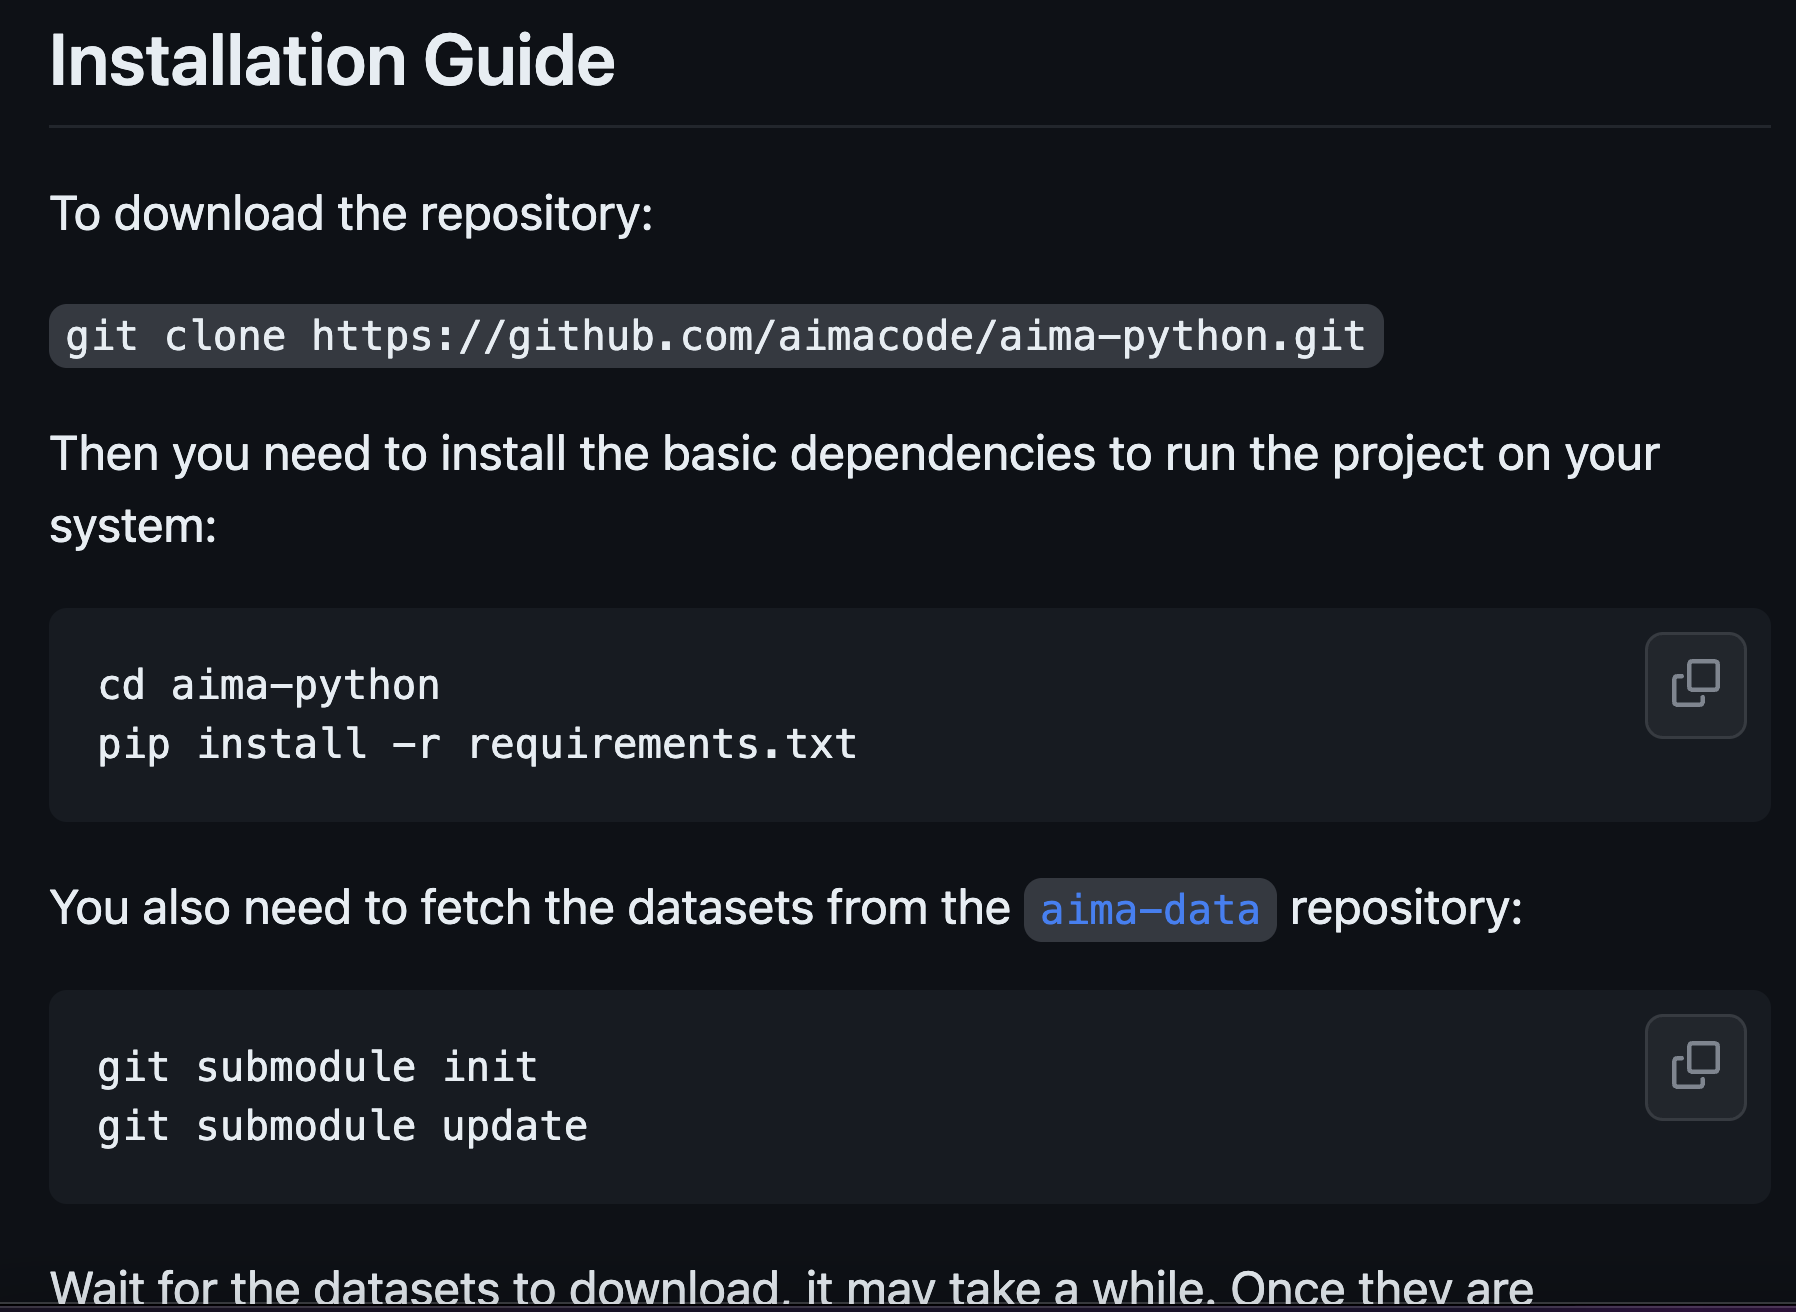

#### Solutions to common issues:
1. `show_map` error - `TypeError: '_AxesStack' object is not callable`
<br>
You can fix this error by upgrading your networkx package: `pip install -upgrade networkx`

2. `orings.csv` data not found
<br>
This shouldn't happen if the above mentioned setup process is followed.

Please post your issues on Piazza, if stuck.

#### Importing necessary libraries below
* Make sure this notebook file is in the aima-python repository, so that search.py is accessible to the notebook

In [2]:
!pip install networkx qpsolvers

In [1]:
from search import *
from notebook import show_map, display_visual

In this homework, we will be working with depth first search (DFS) and breadth first search (BFS) on graphs. We will perform a search traversal of all nodes on paper and from an initial state to a goal state through the [aima-python](https://github.com/aimacode/aima-python) code repository.

### Problem 1: Solve on paper - (5 pts)

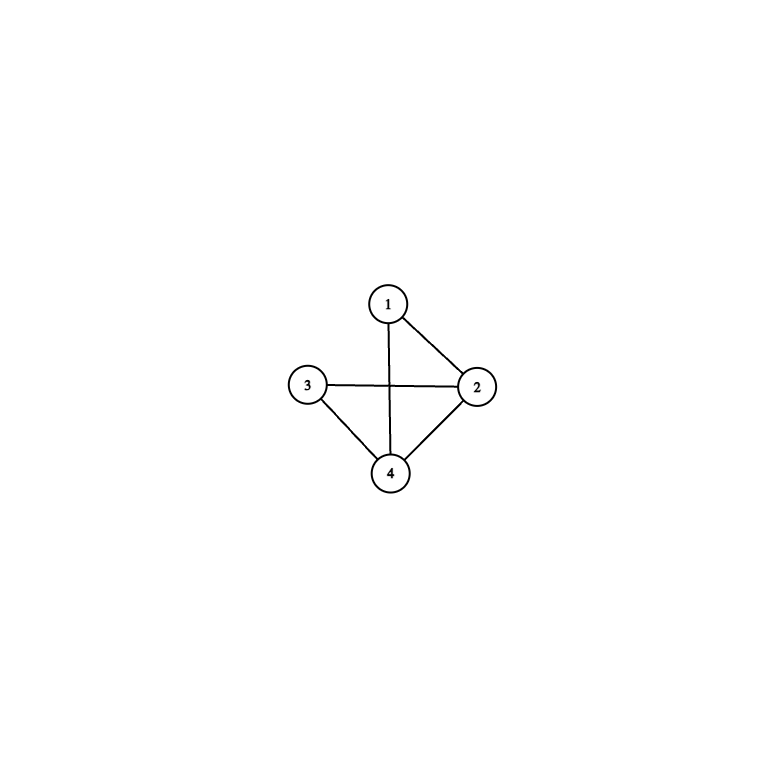

Traverse the graph above in both DFS and BFS traversals, on paper. Consider 1 to be the starting vertex. Read the following instructions completely and solve the problem:-
1. Write down the order in which all nodes get traversed starting from vertex 1
2. At each node, when deciding which child node to pick, pick the lower numbered node first
3. Take a picture of the full working done on paper, insert the images into the below cell/s
4. Briefly explain how the traversal occurs in the perspective of what is the frontier, which node is being currently explored and what nodes have already been explored at each step.

Insert the DFS traversal figure in this cell

Insert the BFS traversal figure in this cell

Add explanations here

### Problem 2: Solve through code - (5 pts)

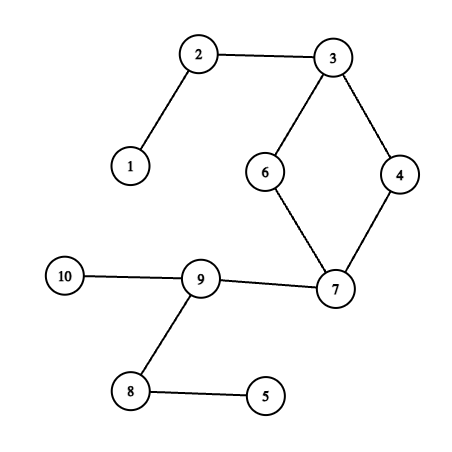

As explained in the lecture, and the textbook, generate a dictionary for the above graph and use it to perform both DFS and BFS traversals startiing from an initial state of vertex 1 to the goal state that is vertex 10, importing the classes and functions from search.py and search.ipynb

Steps to follow:
1. In search.ipynb file, which you can use as reference if required, the Romanian map is used as an example to demonstrate the search algorithms.
2. Understand how the UndirectedGraph class takes a dictionary as an argument. See how the dictionary is being built, and reciprocate the same for the graph given above.
3. Consider all edges to have weights of 1
3. Now, with the data structure created, look at how the graph looks.
4. Lastly, see how the BFS and DFS functions have been called on the GraphProblem instance.
5. Call the same functions for the above created graph data structure and call the visualize function as well with the starting state as vertex 1 and goal state as vertex 10.
6. Look at all cells where the comment ending with "**- write your code here**" is present, and add your code there

In [ ]:
# Generate the dictionary for the given graph in below cell - write your code here
graph = UndirectedGraph({
                    })

In [ ]:
graph.locations = {"Vertex 1": (200, 300), 
                   "Vertex 2": (300, 400), 
                   "Vertex 3": (500, 400), 
                   "Vertex 4": (600, 300),
                   "Vertex 5": (400, 100),
                   "Vertex 6": (400, 300),
                   "Vertex 7": (500, 200),
                   "Vertex 8": (200, 100),
                   "Vertex 9": (300, 200),
                   "Vertex 10": (100, 200),
                  }

# node colors, node positions and node label positions
node_colors = {node: 'white' for node in graph.locations.keys()}
node_positions = graph.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in graph.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in graph.graph_dict.items() for k2, v2 in v.items()}

graph_data = {  'graph_dict' : graph.graph_dict,
                'node_colors': node_colors,
                'node_positions': node_positions,
                'node_label_positions': node_label_pos,
                'edge_weights': edge_weights
            }

In [ ]:
# Verify if the below diagram is same as the graph given above - check the connections and vertices present
show_map(graph_data)

#### BREADTH FIRST GRAPH SEARCH
The code for BFS on graphs is given in below cell

In [ ]:
def breadth_first_search_graph(problem):
    "[Figure 3.11] in text"
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = deque([node])
    
    # modify the color of frontier nodes to blue
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
        
    explored = set()
    while frontier:
        node = frontier.popleft()
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        explored.add(node.state)     
        
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    node_colors[child.state] = "green"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    return(iterations, all_node_colors, child)
                frontier.append(child)

                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
                    
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

In [ ]:
all_node_colors = []

In [ ]:
# Fill appropriate arguments for the GraphProblem instance in this cell - write your code here
# add an example
graph_problem = GraphProblem()

In [ ]:
display_visual(graph_data, user_input=False, 
               algorithm=breadth_first_search_graph, 
               problem=graph_problem)

#### DEPTH FIRST GRAPH SEARCH

In [ ]:
def graph_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    If two paths reach a state, only use the first one. [Figure 3.7]"""
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    frontier = [(Node(problem.initial))]
    explored = set()
    
    # modify the color of frontier nodes to orange
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    while frontier:
        # Popping first node of stack
        node = frontier.pop()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
        
        for n in frontier:
            # modify the color of frontier nodes to orange
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None


def depth_first_graph_search(problem):
    """Search the deepest nodes in the search tree first."""
    iterations, all_node_colors, node = graph_search_for_vis(problem)
    return(iterations, all_node_colors, node)

In [ ]:
all_node_colors = []

In [ ]:
# Fill appropriate arguments for the GraphProblem instance in this cell - write your code here
# GraphProblem(initial_state, goal_state, graph) 
#    where initail_state is the start state of the problem

graph_problem = GraphProblem()

In [ ]:
display_visual(graph_data, user_input=False, 
               algorithm=depth_first_graph_search, 
               problem=graph_problem)

#### Analysis
Answer the below questions, changing the goal state and initial states of the given graph

1. For reaching vertex 10 from vertex 1, how many iterations does both BFS and DFS take in code implementation?
2. Change the goal state to "Vertex 5", and see how many iterations it takes now? Compare the difference and explain why it occurs.
3. Which of these two algorithms would be the best for graph searching? Explain briefly.